In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gibbs

ModuleNotFoundError: No module named 'gibbs'

In [2]:
data = np.loadtxt('./spikes.txt')

times = data[0, :]
firings = data[1, :]

times, indices = np.unique(times, return_index=True)
firings = firings[indices].astype(int)

In [3]:
new_times = np.linspace(0.001, 10, 10000)
new_firings = np.zeros_like(new_times).astype(int)

# Find the indices where the times are registered
indices = np.searchsorted(new_times, times)
new_firings[indices] = firings

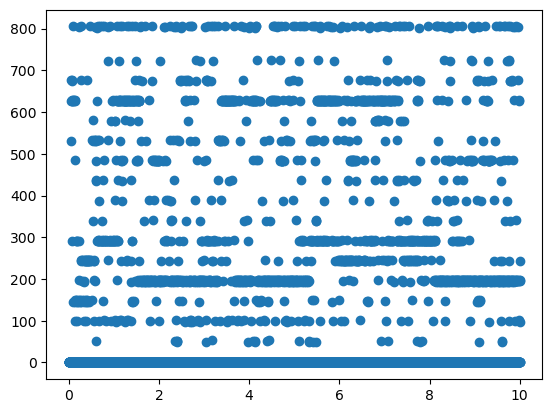

In [4]:
plt.scatter(new_times, new_firings)

In [10]:
K = 4
N = 805
T = len(new_times)
seed = 12345

v = np.ones(K)
u = np.ones((K, K))
w = np.ones((N + 1, K))
num_iterations = 50

pi_est, gamma_est, r_est, running_nmi, running_perc_corr_class, pi_init, gamma_init, r_init = gibbs.gibbs_sampling(new_firings, v, u, w, num_iterations)

In [11]:
print("Pi_est:\n", pi_est)
print("Gamma_est:\n", gamma_est)
print("R_est:\n", r_est)

Pi_est:
 [0.04972556 0.00841681 0.22889553 0.71296211]
Gamma_est:
 [[0.15815865 0.37089965 0.13621194 0.33472976]
 [0.02257564 0.44777794 0.45643801 0.07320841]
 [0.01702528 0.1200379  0.0877284  0.77520843]
 [0.01782978 0.00503672 0.17001618 0.80711732]]
R_est:
 [[4.21789513e-03 7.53989867e-03 4.51573424e-02 1.73394675e-01]
 [7.95640643e-05 1.59653009e-03 1.41252241e-03 1.28105187e-03]
 [1.14689254e-03 5.19348197e-04 1.44194719e-03 2.18440181e-03]
 ...
 [1.45382798e-03 1.81519955e-03 2.49306182e-04 1.93034108e-03]
 [2.71964056e-04 3.10915409e-03 8.16489153e-04 1.83404009e-03]
 [2.63769957e-03 4.54576721e-04 3.34536877e-03 2.24823831e-04]]


In [14]:
N = 805
T = len(new_times)
seed = 12345
num_iterations = 50
    
for K in [2,3,4,5,6,7]:
    print(f'##################### K={K} ########################')

    v = np.ones(K)
    u = np.ones((K, K))
    w = np.ones((N + 1, K))
    
    pi_est, gamma_est, r_est, running_nmi, running_perc_corr_class, pi_init, gamma_init, r_init = gibbs.gibbs_sampling(new_firings, v, u, w, num_iterations)
    print("Pi_est:\n", pi_est)
    print("Gamma_est:\n", gamma_est)
    print("R_est:\n", r_est)

##################### K=2 ########################
Pi_est:
 [0.96596838 0.03403162]
Gamma_est:
 [[9.99102659e-01 8.97340749e-04]
 [9.39880666e-01 6.01193336e-02]]
R_est:
 [[1.27674287e-01 4.46382231e-04]
 [4.89892439e-04 2.38791340e-05]
 [2.31498221e-03 5.53516415e-05]
 ...
 [1.32296653e-03 1.97214114e-03]
 [1.42694382e-03 3.09354811e-04]
 [1.68181195e-03 3.84326471e-05]]
##################### K=3 ########################
Pi_est:
 [0.30636706 0.62600625 0.06762669]
Gamma_est:
 [[0.16921534 0.76320695 0.06757771]
 [0.84087805 0.08380022 0.07532172]
 [0.4385817  0.44865814 0.11276016]]
R_est:
 [[7.62089004e-02 9.15211069e-02 8.32147098e-03]
 [7.62865935e-04 4.32440241e-03 2.20551434e-03]
 [9.97559303e-05 5.11784600e-04 1.89918814e-04]
 ...
 [8.74577849e-04 7.32533884e-05 1.39934054e-03]
 [2.43114537e-03 3.10025358e-04 1.22696487e-03]
 [8.45221806e-04 2.32597386e-03 1.47077743e-04]]
##################### K=4 ########################
Pi_est:
 [0.05903287 0.04564762 0.02861203 0.86670747]
G

In [12]:
# store the results of the runs
for K in [2,3,4,5,6,7]:
    type_run = f'Estimating the parameters from the real data (K={K})'
    num_rep = 10
    gibbs.run_simulation_real(new_firings,T,N,K,seed,num_rep,type_run)

Rep 0...
##########################
Estimated values for the parameters
Estimated Pi =  [0.87194166 0.12805834]
Estimated Gamma =  [[0.99829269 0.00170731]
 [0.89451446 0.10548554]]
Estimated R =  [[1.07334442e-01 4.65595578e-03]
 [3.01144336e-03 1.60929483e-03]
 [3.97007221e-04 3.80431122e-03]
 ...
 [7.86721392e-04 1.69031512e-03]
 [1.67947618e-03 3.32602421e-03]
 [7.03883605e-03 2.17210052e-05]]
Rep 1...
##########################
Estimated values for the parameters
Estimated Pi =  [0.14458187 0.85541813]
Estimated Gamma =  [[0.01054964 0.98945036]
 [0.03320632 0.96679368]]
Estimated R =  [[3.97398435e-03 1.03547087e-01]
 [1.83926297e-04 5.77098788e-04]
 [1.95754366e-04 2.23449702e-03]
 ...
 [5.31265831e-04 7.85144470e-04]
 [6.47836052e-03 9.15989116e-05]
 [8.87585520e-04 3.68171085e-03]]
Rep 2...
##########################
Estimated values for the parameters
Estimated Pi =  [0.79949145 0.20050855]
Estimated Gamma =  [[0.89899917 0.10100083]
 [0.84857252 0.15142748]]
Estimated R =  [